In [2]:
import pandas as pd
import numpy as np
import json
from functools import reduce
import networkx as nx
pd.options.display.width=10000
pd.options.display.max_columns=1000
pd.options.display.max_colwidth=-1
pd.options.display.expand_frame_repr=True
pd.options.display.max_rows=1000
pd.options.display.max_seq_items=1000
# pd.options.display.height=1000
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
dfs = pd.read_json('data.json', lines=True, chunksize=1e5)


In [4]:
# df_list = []
# for i in dfs:
#     display(i.head())
    
#     break

In [5]:
merged_df = pd.concat(dfs)

In [6]:
display(merged_df.head())

contributors coordinates          created_at display_text_range                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   extended_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           extended_tweet  favorite_count  favorited filter_level   geo                   id               id_str in_reply_to_screen_name  in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str  is_quote_status lang place  possibly_sensitive  quote_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [7]:
filtered_df = merged_df.dropna(subset=['retweeted_status'])

In [8]:
filtered_df.shape

(11697, 36)

In [9]:
filtered_df.head(50)

contributors coordinates          created_at display_text_range                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  extended_entities extended_tweet  favorite_count  favorited filter_level   geo                   id               id_str in_reply_to_screen_name  in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str  is_quote_status lang place  possibly_sensitive  quote_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [10]:
users = pd.DataFrame.from_records(filtered_df["user"].values)
users.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Mon Oct 26 01:46:04 +0000 2015,True,False,22 Years Old/SJC Graduate/SC👻: chrisulrichh95,17505,None,395,None,1165,True,4043015782,4043015782,False,en,12,"Shirley, NY",Chris Ulrich,None,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/4043015782/1460500946,http://pbs.twimg.com/profile_images/992637158631591937/j2KyQ8bo_normal.jpg,https://pbs.twimg.com/profile_images/992637158631591937/j2KyQ8bo_normal.jpg,1DA1F2,C0DEED,DDEEF6,333333,True,False,ChrisUlrich95,22230,None,none,None,None,False
1,False,Thu May 21 23:40:47 +0000 2015,True,False,None,2070,None,94,None,76,False,3293481125,3293481125,False,en,0,None,Jon McDonald,None,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/3293481125/1509856139,http://pbs.twimg.com/profile_images/935433544536555520/qd6qK2Mm_normal.jpg,https://pbs.twimg.com/profile_images/935433544536555520/qd6qK2Mm_normal.jpg,1DA1F2,C0DEED,DDEEF6,333333,True,False,jonnnyMac18,459,None,none,None,None,False
2,False,Mon Apr 24 18:18:21 +0000 2017,True,False,None,1450,None,2746,None,3892,False,856573038908669952,856573038908669952,False,vi,2,United States,kids fun,None,F5F8FA,,,False,https://pbs.twimg.com/profile_banners/856573038908669952/1522246794,http://pbs.twimg.com/profile_images/974845709156433921/3Dxpmf9w_normal.jpg,https://pbs.twimg.com/profile_images/974845709156433921/3Dxpmf9w_normal.jpg,1DA1F2,C0DEED,DDEEF6,333333,True,False,KidFunny_,2608,None,none,None,None,False
3,False,Mon May 04 14:34:58 +0000 2015,False,False,#Bitcoin #Ether #Crypto #ICO #blockchain #business #ICOs #Cryptocurrency #invest,3080,None,13406,None,14007,False,3233586964,3233586964,False,ru,33,Россия,Ирина Рыжкова,None,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/3233586964/1524201261,http://pbs.twimg.com/profile_images/999772030378459136/qw5gARcH_normal.jpg,https://pbs.twimg.com/profile_images/999772030378459136/qw5gARcH_normal.jpg,FAB81E,000000,000000,000000,False,False,red_liska,3451,None,none,None,None,False
4,False,Thu Mar 25 19:39:13 +0000 2010,False,False,#RealEstate Broker in #Seattle #Eastside #Bellevue. Assisting buyers/sellers through the #housing market for 20+ years - I followback and RT those who RT me!,37762,None,4919,None,4881,True,126406947,126406947,False,en,427,"Seattle/Bellevue, WA",Stacey Cross,None,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/126406947/1520266239,http://pbs.twimg.com/profile_images/1277544664/fixed_summer_in_2010_normal.jpg,https://pbs.twimg.com/profile_images/1277544664/fixed_summer_in_2010_normal.jpg,666666,000000,000000,000000,False,False,Lookwherewelive,21302,None,none,http://lookwherewelive.com,None,False


In [11]:
retweets = filtered_df["retweeted_status"].apply(pd.Series)
retweets.head()

created_at                   id               id_str                                                                                                                                          text display_text_range                                                                              source  truncated  in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id in_reply_to_user_id_str in_reply_to_screen_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          user   geo coordinates                                                                                                                                                                                                                                                                                                                                                                                         place contributors  quoted_status_id quoted_status_id_str                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [12]:
owners = pd.DataFrame.from_records(retweets[["user"]].values)

In [13]:
def get_text(retweeter_name):
    user_rows = users[users['screen_name'] == retweeter_name].reset_index()['index'].values
    retweeted_status = pd.DataFrame.from_records(owners.iloc[user_rows][0].values)
    retweeted_status['text']=retweets.iloc[user_rows].reset_index(drop=True)['text']
    retweeted_status['retweeter']=retweeter_name
    return retweeted_status[["retweeter", "screen_name", "text"]].rename(columns={"screen_name":"tweet_owner"})

In [14]:
import multiprocessing as multi

p = multi.Pool(processes=8)
combined=pd.concat(list(p.map(get_text,users['screen_name'].unique())))

#combined = pd.concat(list(map(get_text,users['screen_name'].unique())))
combined.head()

,retweeter,tweet_owner,text
0,ChrisUlrich95,MaconBlair,Am excite. https://t.co/bjIENMg0SI
0,jonnnyMac18,nataliemorales,"Ruby, you have a ghost. This is straight up terrifying. https://t.co/DM0y77CWHI"
0,KidFunny_,TreonNews,Treon 'ICO' Review (Ru-1)\n\n#Treon Brings Crypto Revolution To Utility Payments\n\n#Treon #Treon_ICO #Pre_ICO… https://t.co/3jX7RrSxPG
1,KidFunny_,TreonNews,"Обзор проекта Treon, @schepka_a\n\nhttps://t.co/hHZbQfSW3n\n\n#Treon #Treon_ICO #Pre_ICO #Top_ICOs #Blockchain… https://t.co/ABbDQS3x1y"
0,red_liska,tvtwocom,Have you heard the news? https://t.co/oEFpV4TY1X // #tvrevolution #crypto #cryptocurrencies #bitcoin #ethereum… https://t.co/KyxH8XHzte


In [15]:
G=nx.from_pandas_edgelist(combined, "retweeter", "tweet_owner")

In [22]:
components = sorted(list(nx.connected_components(G)), key=lambda x: len(x), reverse=True)
len(components[0])

4413

In [23]:
retweeter_or_tweet_owner_screen_names0 = components[0]

In [34]:
component0 = combined.loc[combined['retweeter'].isin(retweeter_or_tweet_owner_screen_names0)]
maxi = 0
argmax=0
index = 0
df_t=[]
for text, df_text in component0.groupby(by=["text"]):
    index = index+1
    if(maxi<df_text.shape[0]):
        maxi=df_text.shape[0]
        argmax=index-1
        df_t=df_text
display(maxi, index, df_t.shape)

508

2050

(508, 3)

In [25]:
type(retweeter_to_tweet_owner_df["tweet_owner"].value_counts())

NameError: name 'retweeter_to_tweet_owner_df' is not defined

In [ ]:
retweeter_to_tweet_owner_df['tweet_owner'].value_counts()

In [ ]:
G1 = nx.from_pandas_edgelist(retweeter_to_tweet_owner_df, "retweeter", "tweet_owner")

In [ ]:
values = nx.betweenness_centrality(G1, 15)
sorted(values.items(), key=lambda x: x[1], reverse=True)

In [ ]:
values

In [ ]:
plt.figure(1, figsize=(40, 18))
nx.draw_circular(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

#plt.show()

plt.savefig('monster.svg', format='svg')

In [ ]:
plt.figure(2, figsize=(40, 18))
nx.draw_networkx(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster1.svg', format='svg')

In [ ]:
plt.figure(3, figsize=(40, 18))
nx.draw_spring(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster2.svg', format='svg')

In [ ]:
plt.figure(4, figsize=(40, 18))
nx.draw_spectral(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster4.svg', format='svg')

In [ ]:
plt.figure(5, figsize=(40, 18))
nx.draw_kamada_kawai(G1, node_size=0.2, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster5.svg', format='svg')

In [ ]:
plt.figure(6, figsize=(40, 18))
nx.draw_shell(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster6.svg', format='svg')

In [ ]:
retweeter_or_tweet_owner_screen_names=centralities[129]
s = combined.loc[combined['retweeter'].isin(retweeter_or_tweet_owner_screen_names)]
G2 = nx.from_pandas_edgelist(s, "retweeter", "tweet_owner")

plt.figure(8, figsize=(10, 8))
nx.draw_kamada_kawai(G2, node_size=0.2, font_size=3, font_color='green', edge_color='blue', width=0.1, style='solid', with_labels=True)

# plt.show()

plt.savefig('monster8.png', format='png', dpi=600)

In [ ]:
# nx.draw_networkx(G)

In [ ]:
retweeted_entities = retweets["entities"].apply(pd.Series)
retweeted_entities.head()

In [ ]:
retweet_users= retweets["user"].apply(pd.Series)
retweet_users.head()

In [ ]:
entities = pd.DataFrame.from_records(df["entities"].values)
entities.head()

In [ ]:
entities["hashtags"].iloc[3]

In [ ]:
display(df.columns)
display(users.columns)
display(entities.columns)
display(retweets.columns)
display(retweeted_entities.columns)
display(retweet_users.columns)

In [ ]:
display(df.shape)
display(users.shape)
display(entities.shape)
display(retweets.shape)
display(retweeted_entities.shape)
display(retweet_users.shape)

In [ ]:
imp = retweets["entities"].apply(pd.Series)['user_mentions']
imp.head()

In [ ]:
combined.head()

In [ ]:
merged_df = []
combined = []
owners = []
retweets = []
centralities = []


In [53]:
Gx = nx.from_pandas_edgelist(df_t,"retweeter","tweet_owner")
values1 = nx.betweenness_centrality(Gx, 15)
df_t['betweenness_centrality']=df_t['retweeter'].apply(lambda x:values1[x])

values=sorted(values1.items(), key=lambda x: x[1], reverse=True)
v=[x for (x,y) in values[0:100]]
df_x = df_t[(df_t["retweeter"].isin(v))]
display(df_x.shape)
display(df_t.head())
Gx = nx.from_pandas_edgelist(df_x,"retweeter","tweet_owner")
# Gx = nx.from_pandas_edgelist(df_x,"retweeter","tweet_owner", edge_attr=["betweenness_centrality"])

(99, 4)

,retweeter,tweet_owner,text,betweenness_centrality
2,CheerSquadZ,joinbuglab,Buglab explained : We produced this video for you in 6 languages ! #Blockchain #Explainer #Cybersecurity #Pentest… https://t.co/rJa49N70Fi,0.0
2,BuffGirlFuller,joinbuglab,Buglab explained : We produced this video for you in 6 languages ! #Blockchain #Explainer #Cybersecurity #Pentest… https://t.co/rJa49N70Fi,0.0
1,goodmanforhire8,joinbuglab,Buglab explained : We produced this video for you in 6 languages ! #Blockchain #Explainer #Cybersecurity #Pentest… https://t.co/rJa49N70Fi,0.0
1,Aarifinusa,joinbuglab,Buglab explained : We produced this video for you in 6 languages ! #Blockchain #Explainer #Cybersecurity #Pentest… https://t.co/rJa49N70Fi,0.0
2,ahmedzahari,joinbuglab,Buglab explained : We produced this video for you in 6 languages ! #Blockchain #Explainer #Cybersecurity #Pentest… https://t.co/rJa49N70Fi,0.0


<IPython.core.display.Javascript object>


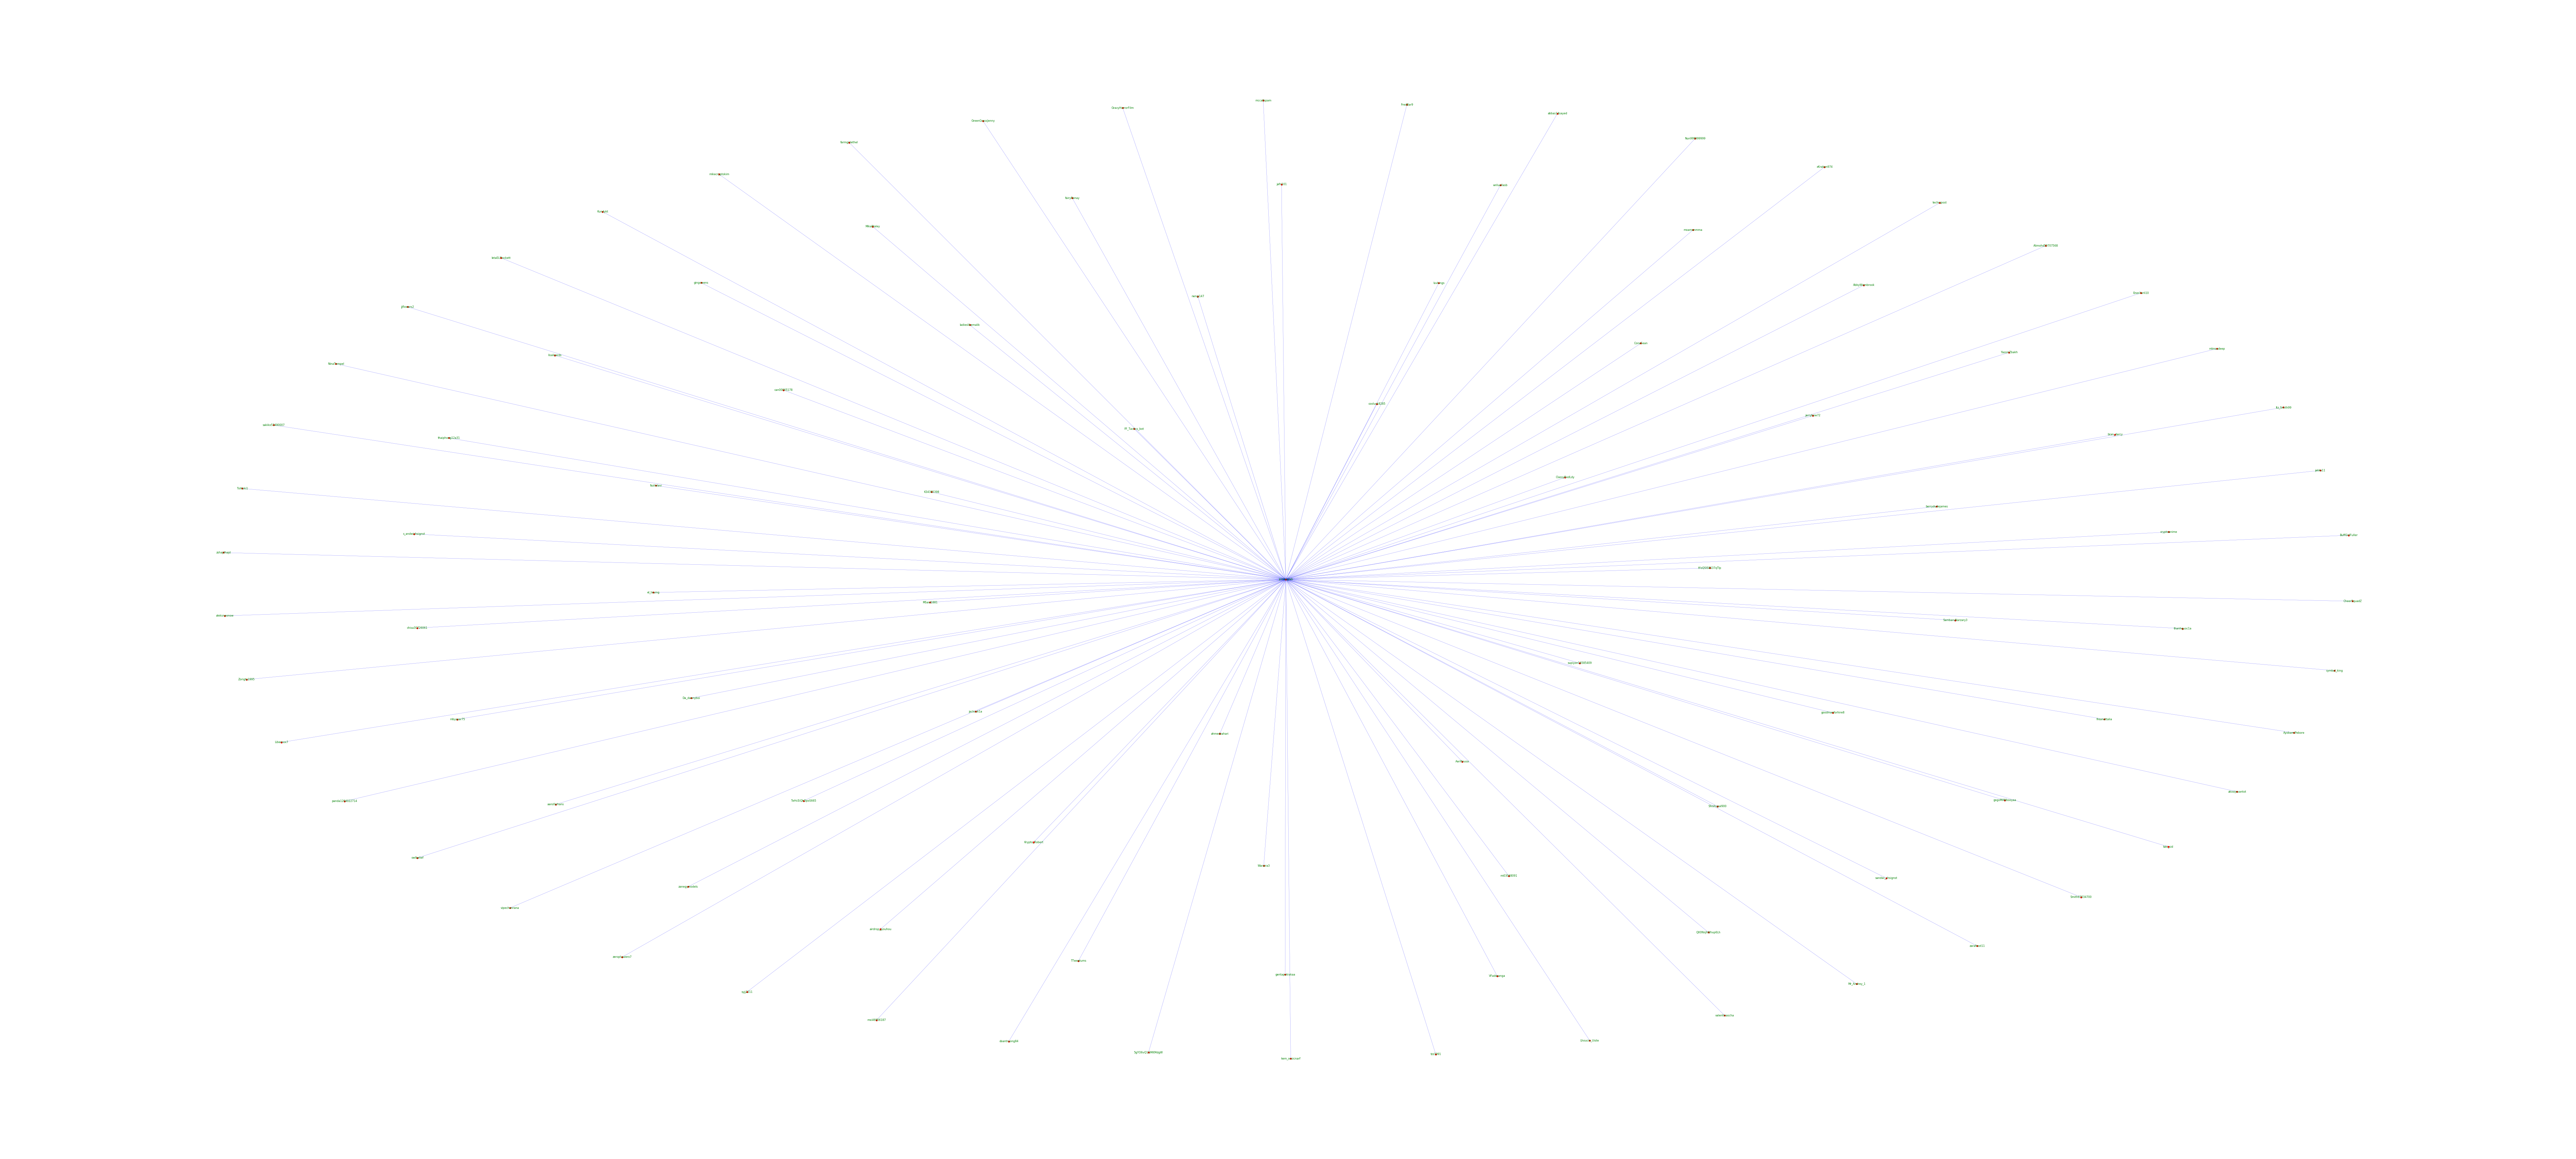

In [42]:
plt.figure(5, figsize=(40, 18))
nx.draw_kamada_kawai(Gx, node_size=1, font_size=3, font_color='green', edge_color='blue', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monsterx.svg', format='svg')

In [47]:
values1["fairyRenay"]

0.0

In [50]:
len(df_t['retweeter'].unique())

507

In [58]:
list(nx.jaccard_coefficient(Gx))

[('Waraira3', 'vipechanrana', 1.0),
 ('Waraira3', 'supiyon16585409', 1.0),
 ('Waraira3', 'FF_Tactics_bot', 1.0),
 ('Waraira3', 'AyobamiPebore', 1.0),
 ('Waraira3', 'CheerSquadZ', 1.0),
 ('Waraira3', 'ahmedzahari', 1.0),
 ('Waraira3', 'doantruong84', 1.0),
 ('Waraira3', 'zanegymodels', 1.0),
 ('Waraira3', 'VFaderanga', 1.0),
 ('Waraira3', 'jekks11', 1.0),
 ('Waraira3', 'xKraken974', 1.0),
 ('Waraira3', 'freanettalia', 1.0),
 ('Waraira3', 'farmgirlethel', 1.0),
 ('Waraira3', 'TeHcEiQkOpoS665', 1.0),
 ('Waraira3', 'el_teuing', 1.0),
 ('Waraira3', 'MikaBlaley', 1.0),
 ('Waraira3', 'mikecryptokim', 1.0),
 ('Waraira3', 'abbas14sayed', 1.0),
 ('Waraira3', 'tzz1991', 1.0),
 ('Waraira3', 'jjflowers2', 1.0),
 ('Waraira3', 'Libernox7', 1.0),
 ('Waraira3', 'jerrybow72', 1.0),
 ('Waraira3', 'Krypto_Robert', 1.0),
 ('Waraira3', 'tYoQSlS8S37qTlp', 1.0),
 ('Waraira3', 'Da_dannyboi', 1.0),
 ('Waraira3', 'ConaSean', 1.0),
 ('Waraira3', 'Mr_Andrey_1', 1.0),
 ('Waraira3', 'goodmanforhire8', 1.0),
 ('Warai